In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [11]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [12]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect=True)

In [13]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
measurements = Base.classes.measurement

station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [101]:
# Find the most recent date in the data set.
import datetime as dt


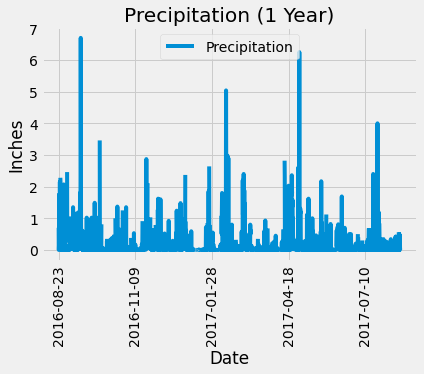

In [127]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 




# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df = pd.DataFrame(prcp_query, columns = ['Date','Precipitation'])
prcp_df.set_index('Date',inplace = True)


# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by='Date',ascending=True)
prcp_df

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(title="Precipitation (1 Year)")
plt.xticks(rotation='vertical')
plt.ylabel('Inches')
plt.legend(loc='best')
plt.show()



In [128]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [129]:
# Design a query to calculate the total number stations in the dataset
stations_count = session.query(station.station).group_by(station.station).count()
stations_count

9

In [141]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurements.station,func.count(measurements.station)).group_by(measurements.station).\
order_by(func.count(measurements.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [149]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = active_stations[0][0]
most_active

station_stats = session.query(measurements.station,func.min(measurements.tobs),func.max(measurements.tobs),func.avg(measurements.tobs)).\
filter(measurements.station == most_active).all()

station_stats
print(f'The most active station is {most_active}')
print(f'The lowest temperature is {station_stats[0][1]}')
print(f'The highest temperature is {station_stats[0][2]}')
print(f'The average temperature is {round(station_stats[0][3],2)}')

The most active station is USC00519281
The lowest temperature is 54.0
The highest temperature is 85.0
The average temperature is 71.66


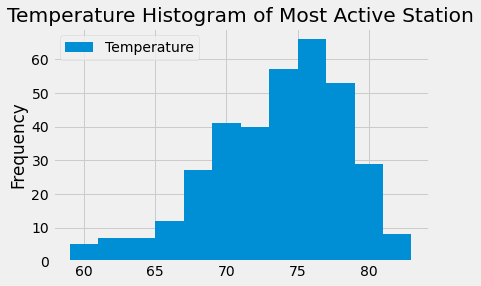

In [158]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temps = session.query(measurements.tobs).filter(measurements.date >= year_ago).\
filter(measurements.station == most_active).all()

temps_df = pd.DataFrame(station_temps, columns = ["Temperature"])

temps_df.plot.hist(bins=12,title="Temperature Histogram of Most Active Station")

plt.show()



# Close session

In [159]:
# Close Session
session.close()